## Explaining SHAP

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
import shap

In [4]:
from sklearn import datasets

#### Importing python dataset and assigning variable names

In [5]:
df = pd.DataFrame(datasets.load_wine().data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df.columns = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12','target']

#### Using Ensembling model to train and predict

### Random forest

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)
y = df['target']
X = df[["var1","var2","var3","var4","var5","var6","var7","var8","var9","var10","var11","var12"]]

In [8]:
# Build the model with the random forest regression
model2 = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model2.fit(X, y)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

* Prediction using original model

In [9]:
model2.predict(X)

array([ 999.06852869, 1021.43846395, 1185.18155345, 1292.42242647,
        866.21111111, 1349.00238095, 1190.2530754 , 1224.64277882,
       1163.52105263, 1120.38085901, 1317.07056244, 1190.72437533,
       1115.33494152, 1210.98216374, 1483.78333333, 1319.12936508,
       1248.76152882, 1232.21986216, 1485.1       , 1009.86925187,
        870.40716374,  817.68872475, 1003.98817155,  858.12818381,
        972.88194444,  864.30277778, 1110.12073474,  819.26850649,
        906.61495726,  880.94698455, 1213.75597327, 1389.07383041,
        996.2093254 , 1248.27541771, 1027.03045113, 1002.42081628,
        953.39711779,  992.43693381,  913.83223684,  875.5218254 ,
       1029.85585901,  909.64473684, 1109.26476469,  828.03333333,
        943.95908425, 1083.9762903 ,  966.46697012,  992.21697012,
       1207.21827485, 1213.5245098 , 1001.7977193 , 1181.44940275,
       1192.3009979 , 1272.23375104, 1088.35386383, 1151.9025852 ,
       1057.75863679, 1237.09883041, 1233.19404762,  519.59004

In [10]:
# OBSERVATION 1 prediction
model2.predict(X)[0]

999.0685286935286

In [11]:
# Using Kernel shap to approximate shapley values
# shapley kernel is used to overcome the complexity of making numereous coalitions.

masker = shap.maskers.Independent(X, 50)
explainer = shap.KernelExplainer(model2.predict, masker.data)

shap_values = explainer.shap_values(X)


  0%|          | 0/178 [00:00<?, ?it/s]

In [12]:
# Null model prediction (Avg_prediction)
explainer.expected_value

711.5330736589262

In [13]:
shap_values.shape

(178, 12)

In [14]:
# Shapley values in Dataframe
shap_frame = pd.DataFrame(shap_values,columns=X.columns)
shap_frame

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,75.070549,1.816924,-2.010980,10.597252,47.681082,-2.607608,131.188821,1.835931,-4.861626,43.382359,-5.461489,-9.095760
1,108.309057,5.980105,3.575720,8.914580,59.067558,-7.430154,126.883830,4.664730,8.323822,-30.326779,25.869418,-3.926497
2,119.270877,6.093593,6.176884,6.884506,62.778208,-2.713013,180.669329,1.087073,2.059555,81.792894,-3.613451,13.162024
3,129.611379,3.713929,24.747114,9.851743,77.054683,-6.807645,230.189554,9.692547,-1.249620,149.978828,-5.162482,-40.730678
4,88.804927,-1.395013,-20.692784,-2.285697,67.841866,1.478476,101.804637,-2.489460,-2.850233,-87.135515,-0.837801,12.434633
...,...,...,...,...,...,...,...,...,...,...,...,...
173,41.368427,2.475124,4.979054,1.298590,17.741289,2.947479,-169.266557,-1.513638,-0.067463,70.672263,-6.382588,-20.655506
174,70.089569,3.368361,4.515340,-3.010667,34.559630,2.002437,-144.162770,-2.035013,3.800081,53.959796,-5.411257,-25.108581
175,92.653668,5.547011,7.916858,0.765741,46.372474,15.651591,-117.834349,-1.830206,10.606823,69.510747,-8.941371,-13.333728
176,87.753512,-2.575208,4.580695,0.535066,41.824897,12.071201,-145.361625,-0.941328,3.884350,73.234487,-10.186412,-15.269376


In [15]:
# prediction
y_pred = model2.predict(X)
y_pred[0]

999.0685286935286

In [16]:
# Explanatory model (additive)
explainer.expected_value + np.sum(shap_frame.iloc[0,:])

999.0685286935286

In [17]:
# shapley value for 1st observation 
obs = pd.DataFrame(shap_frame.iloc[0,:]).T
obs["pred"] = y_pred[0] 
obs

#final prediction = the average prediction + the shap values of all features.

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,pred
0,75.070549,1.816924,-2.01098,10.597252,47.681082,-2.607608,131.188821,1.835931,-4.861626,43.382359,-5.461489,-9.09576,999.068529


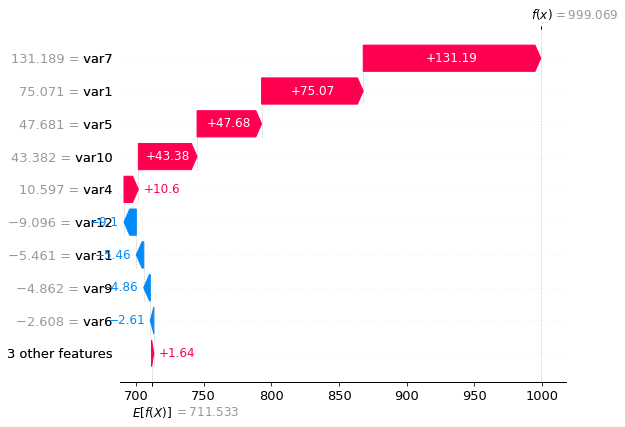

In [18]:
# WATERFALL plot 

shap_object = shap.Explanation(base_values = explainer.expected_value,
                                values = shap_values[0],
                                feature_names = X.columns,
                                data = shap_values[0].data)

shap.plots.waterfall(shap_object)

### Variable importance for prediction using  Mean of absolute shap values

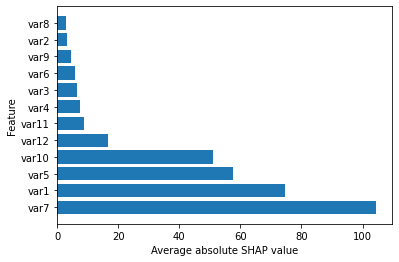

In [19]:
# calculate feature importance
importance_values = pd.DataFrame(abs(shap_values).mean(0), index=X.columns, columns=['importance'])
importance_values = importance_values.sort_values('importance', ascending=False)

# plot feature importance
plt.barh(importance_values.index, importance_values['importance'])
plt.xlabel('Average absolute SHAP value')
plt.ylabel('Feature')
plt.show()

### Variable summary plot using shapley values

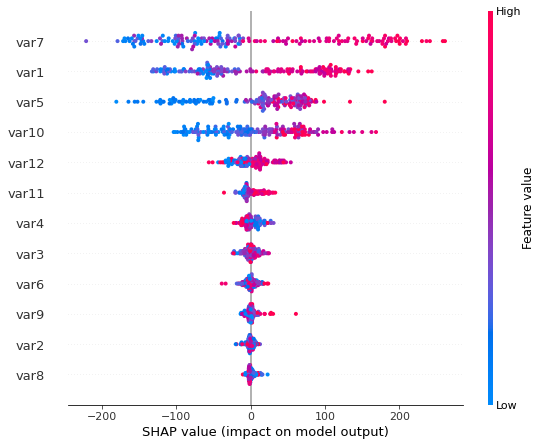

In [20]:
# Beeswarm plot to see the relation of the features with the target using shap values
shap.summary_plot(shap_values,X)